In [6]:
import pyodbc


def insert_into_db(table_name, df):
    # Define the connection string
    server = 'DESKTOP-3AGL6VH'
    database = 'db_round1'
    trusted_connection = 'yes'  # Use Windows Authentication
    driver = '{SQL Server}'  # Driver for SQL Server

    # Construct the connection string
    connection_string = f'SERVER={server};DATABASE={
        database};Trusted_Connection={trusted_connection};DRIVER={driver}'

    try:
        # Connect to the database
        conn = pyodbc.connect(connection_string)

        # Create a cursor
        cursor = conn.cursor()

        # # Generate the CREATE TABLE query based on DataFrame columns
        # columns_str = ', '.join([f'[{col}] NVARCHAR(255)' for col in df.columns])
        # create_table_query = f'CREATE TABLE [{table_name}] ({columns_str})'
        # cursor.execute(create_table_query)
        # # print(f"Table '{table_name}' created successfully.")

        # Truncate the table before inserting new data
        cursor.execute(f'TRUNCATE TABLE [{table_name}]')

        # for index, row in df.iterrows():
        #     # Generate the INSERT query dynamically
        #     values = ', '.join([f"'{str(value)}'" for value in row])
        #     insert_query = f"INSERT INTO [{table_name}] VALUES ({values})"
        #     cursor.execute(insert_query)

        for index, row in df.iterrows():
            # Generate the INSERT query dynamically
            placeholders = ', '.join(['?' for _ in range(len(row))])
            insert_query = f"INSERT INTO [{
                table_name}] VALUES ({placeholders})"
            cursor.execute(insert_query, row.tolist())

        print(f"Data inserted into the '{table_name}' table successfully.")

        # Commit the transaction
        conn.commit()

        # Close the cursor and connection
        cursor.close()
        conn.close()

    except Exception as e:
        print(f"Error: {str(e)}")

In [10]:
import pyodbc
import pandas as pd


def process_table(table_name, rows):
    # Define the connection string
    server = 'DESKTOP-3AGL6VH'
    database = 'db_round1'
    trusted_connection = 'yes'  # Use Windows Authentication
    driver = '{SQL Server}'  # Driver for SQL Server

    # Construct the connection string
    connection_string = f'SERVER={server};DATABASE={
        database};Trusted_Connection={trusted_connection};DRIVER={driver}'

    try:
        # Connect to the database
        conn = pyodbc.connect(connection_string)

        # Construct the query to select all data from the table
        query = f'SELECT * FROM [{table_name}]'

        # Execute the query and load data into a DataFrame
        df = pd.read_sql(query, conn)

        # Limit DataFrame to first 66 rows
        df = df.head(rows)

        # Save the DataFrame to CSV
        csv_filename = f'{table_name}.csv'
        df.to_csv(csv_filename, index=False)
        # insert_into_db(table_name, df)

        # Close the database connection
        conn.close()

    except Exception as e:
        print(f"Error processing table {table_name}: {str(e)}")


def process_all_tables():
    # Define the connection string
    server = 'DESKTOP-3AGL6VH'
    database = 'db_round1'
    trusted_connection = 'yes'  # Use Windows Authentication
    driver = '{SQL Server}'  # Driver for SQL Server

    # Construct the connection string
    connection_string = f'SERVER={server};DATABASE={
        database};Trusted_Connection={trusted_connection};DRIVER={driver}'

    try:
        # Connect to the database
        conn = pyodbc.connect(connection_string)

        # Get a list of all tables in the database
        cursor = conn.cursor()
        cursor.execute(
            "SELECT TABLE_NAME FROM INFORMATION_SCHEMA.TABLES WHERE TABLE_TYPE='BASE TABLE'")
        tables = [row.TABLE_NAME for row in cursor.fetchall()]
        cursor.close()

        # Process each table
        for table_name in tables:
            '''
            Global Carbon Budget
            Consumption Emissions
            Territorial Emissions
            Emissions Transfers
            Cement Carbonation Sink
            Fossil Emissions by Category
            Historical Budget
            ocean sink
            Terrestrial Sink
            land-use change emissions
            '''
            if table_name == 'land-use change emissions':
                rows = 66
                process_table(table_name, rows)
            elif table_name == 'Global Carbon Budget':
                rows = 64
                process_table(table_name, rows)
            elif table_name == 'Consumption Emissions':
                rows = 35
                process_table(table_name, rows)
            elif table_name == 'Territorial Emissions':
                rows = 174
                process_table(table_name, rows)
            elif table_name == 'Emissions Transfers':
                rows = 35
                process_table(table_name, rows)
            elif table_name == 'Cement Carbonation Sink':
                rows = 64
                process_table(table_name, rows)
            elif table_name == 'Fossil Emissions by Category':
                rows = 173
                process_table(table_name, rows)
            elif table_name == 'Historical Budget':
                rows = 273
                process_table(table_name, rows)
            elif table_name == 'ocean sink':
                rows = 65
                process_table(table_name, rows)
            elif table_name == 'Terrestrial Sink':
                rows = 66
                process_table(table_name, rows)

        # Close the database connection
        conn.close()

    except Exception as e:
        print(f"Error processing all tables: {str(e)}")


# Call the function to process all tables
process_all_tables()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_5668\106170029.py:24: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


<Axes: >

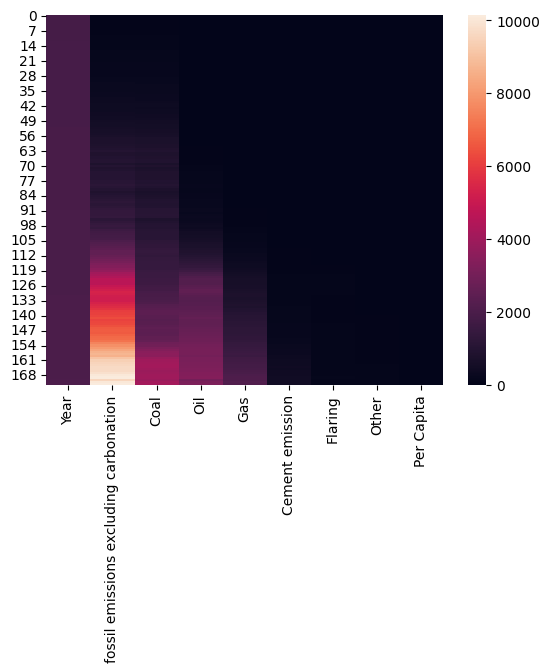

In [7]:
import seaborn as sns
import pandas as pd

df = pd.read_csv('Fossil Emissions by Category.csv')
sns.heatmap(df)

# Output:
# A heatmap visualization of the data